# Arnold 1998 SupraGlacialRouting Component
This is an first attempt to create a Landlab component to simulate the routing of meltwater (and rain) on the surface of a glacier, using the model from Arnold et al.(1998), Hydrological Processes. 12, 191–219.

Vertical flow in snow: $D=\kappa_{e}d/(3\rho_{w}g/\mu)^{1/3}k^{1/3}q^{2/3}$

Horizontal flow in snow: $C_{s}=(\rho_{w}g/\mu)k\theta/\kappa$

Horizontal flow on top of the ice surface: $C_{i}=R^{2/3}\theta^{1/2}/n$

In [24]:
import matplotlib.pyplot as plt

from landlab import RasterModelGrid
from landlab.plot.imshow import imshow_grid
from landlab.components import FlowDirectorD8
from landlab.components import FlowAccumulator

from landlab.plot.drainage_plot import drainage_plot

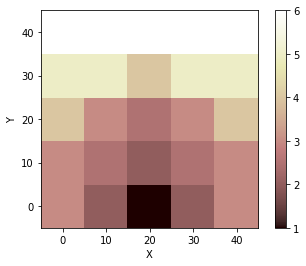

In [84]:
R=0.035
n=0.05
#Create Grid
mg = RasterModelGrid((5, 5), 10.)  # a square-cell raster, ((rows x columns), unit spacing)
#Add data on field:
    #Elevation
z=[3,2,1,2,3,
  3,2.5,2,2.5,3,
  4,3,2.5,3,4,
  5,5,4,5,5,
  6,6,6,6,6]
mg.add_field('node','topographic__elevation',z) #(group, name, value_array, units=’-’, copy=False, noclobber=False)
    #Slope
sl=mg.calc_grad_at_link(z) #calculate the slope from the elevation data
mg.add_field('link','slope',sl)
#Snow
sn=[0,0,0,0,0,
     0,0,0,0,0,
     0,0,0,0,0,
     1,1,1,1,1,
     1,1,1,1,1]
mg.add_field('node','snow',sn)
#Melt at node
mg.add_ones('node','water__unit_flux_in')
mg.at_node['water__unit_flux_in']=mg.at_node['water__unit_flux_in']/8
#Velocitiy at link
ci=(R**(2/3)*abs(mg.at_link['slope'])**(1/2))/n
mg.add_field('link','runoff_rate',ci)

#Discharge at link
#q=calc_flux_div_at_node()

imshow_grid(mg,'topographic__elevation')
#imshow_grid(mg,'snow')

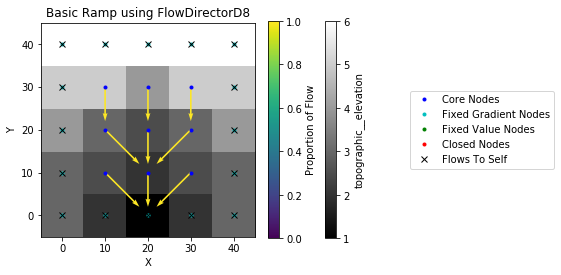

In [77]:
fd = FlowDirectorD8(mg)
fd.run_one_step()
plt.figure()
drainage_plot(mg, title='Basic Ramp using FlowDirectorD8')

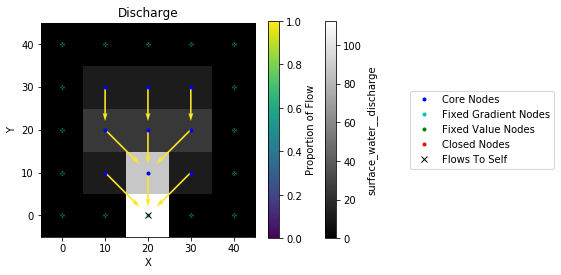

In [88]:

fa = FlowAccumulator(mg, 
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     #runoff_rate=None,
                     depression_finder=None)
fa.run_one_step()
drainage_plot(mg, 'surface_water__discharge', title = 'Discharge')